In [41]:
import pandas as pd
import numpy as np
import geopandas as gpd
import utlis.map_plot as map_plot
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from pyts.metrics import dtw

In [42]:
df = pd.read_csv('selected_data.csv')
df.loc[:,"1991":"2021"] = df.loc[:,"1991":"2021"].interpolate('linear', axis =1, limit_direction='both')
#df.head()

In [43]:
def plot_time_series_compare_matrix(cm, class_names, title, size = 8):
    figure = plt.figure(figsize=(size, size))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    plt.tight_layout()
    plt.show()

In [44]:
df['Category Name'].unique()

array(['agriculture_rural_development', 'aid_effectiveness',
       'climate_change', 'economy_growth', 'education', 'energy_mining',
       'environment', 'financial_sector', 'gender', 'health',
       'infrastructure', 'private_sector', 'social_development',
       'social_protection_labor', 'trade', 'urban_developmen'],
      dtype=object)

In [45]:
def get_indicator_dtw_matrix(df_indicator):
    indicator_compare_dataframe = pd.DataFrame(index = df_indicator['Country Name'].unique())
        
    for country_main in df_indicator['Country Name'].unique():
        country_compare_series = pd.Series(index = df_indicator['Country Name'].unique())
        country_select = df_indicator['Country Name'] == country_main
        x = df_indicator.loc[country_select, '1991':'2021'].iloc[0]
        for country_compare in df_indicator['Country Name'].unique():
            country_select = df_indicator['Country Name'] == country_compare
            y = df_indicator.loc[country_select, '1991':'2021'].iloc[0]
            country_compare_series[country_compare] = dtw(x, y, method='sakoechiba', options={'window_size': 0.5})
        indicator_compare_dataframe[country_main] = country_compare_series
    return indicator_compare_dataframe

In [48]:
def get_sum_of_dtw_matrix(df, category_name):
    print('\033[1m' + category_name + '\033[0m')
    print()
    category_filter = df['Category Name'] == category_name
    array_size = df['Country Name'].nunique()
    sum_of_indicators = np.zeros((array_size, array_size))
    for indicator_name in df[category_filter]['Indicator Name'].unique():
        print(indicator_name)
        scalar = StandardScaler()
        indicator_compare_dataframe = get_indicator_dtw_matrix(df[df['Indicator Name'] == indicator_name])
        sum_of_indicators += scalar.fit_transform(indicator_compare_dataframe)

    columns = df['Country Name'].unique()
    #plot_time_series_compare_matrix(sum_of_indicators, columns, category_name, size = 30)
    return pd.DataFrame(sum_of_indicators, columns = columns, index = columns)

agriculture_rural_development

Rural population (% of total population)
Employment in agriculture (% of total employment) (modeled ILO estimate)


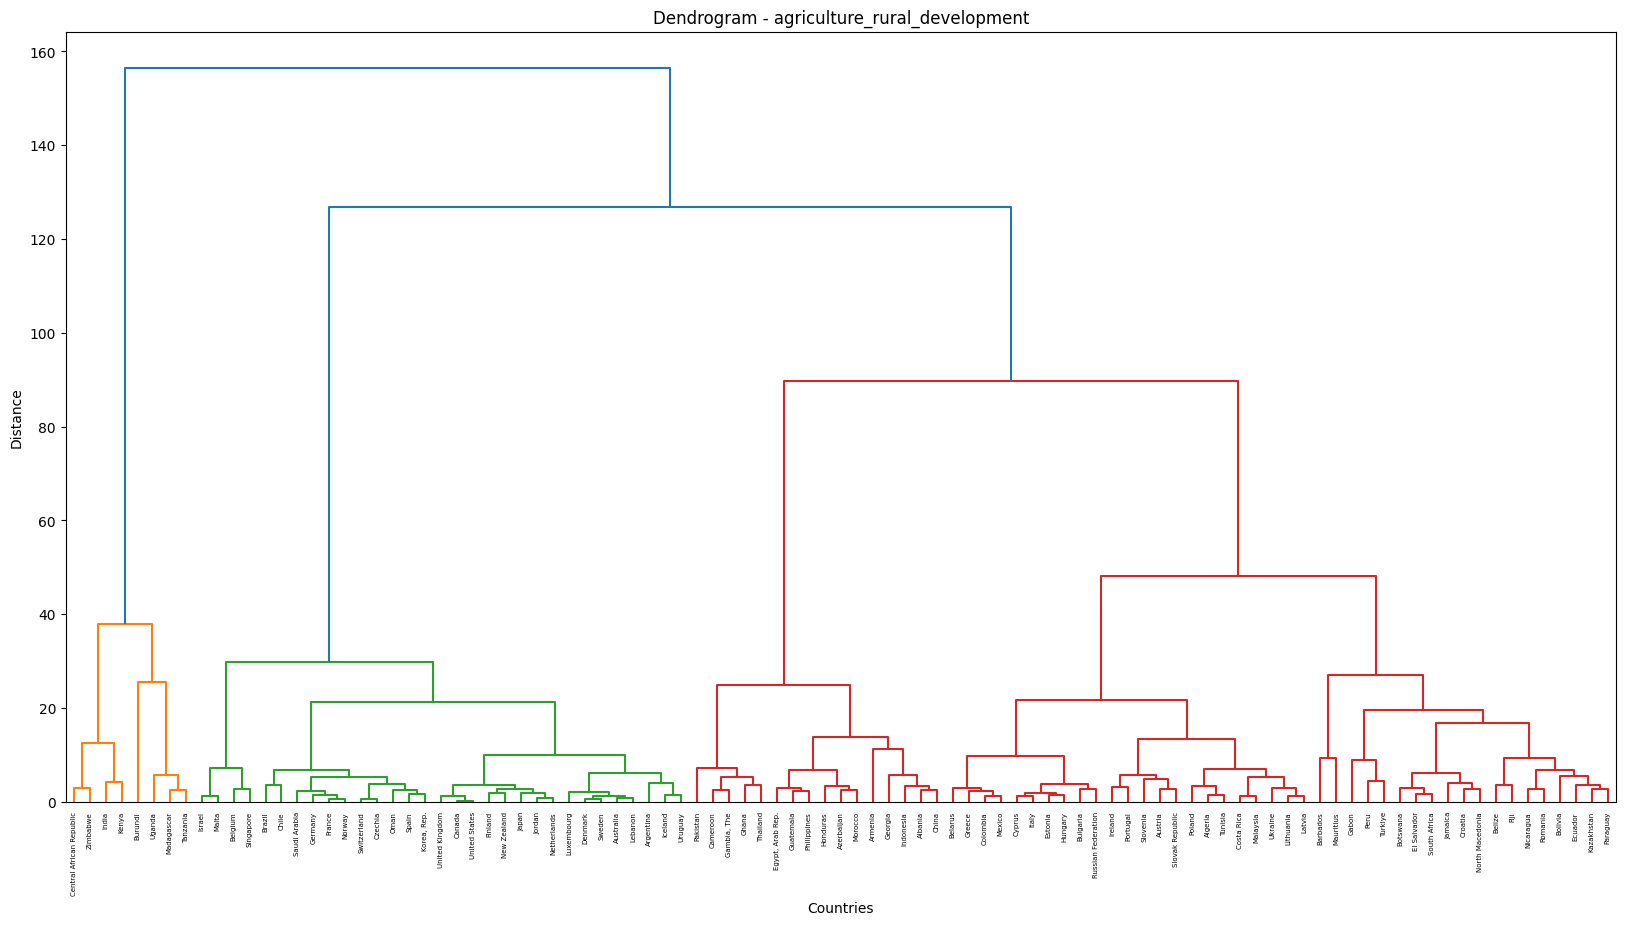

aid_effectiveness

Net migration
Vulnerable employment, total (% of total employment) (modeled ILO estimate)
Mortality rate, under-5 (per 1,000 live births)


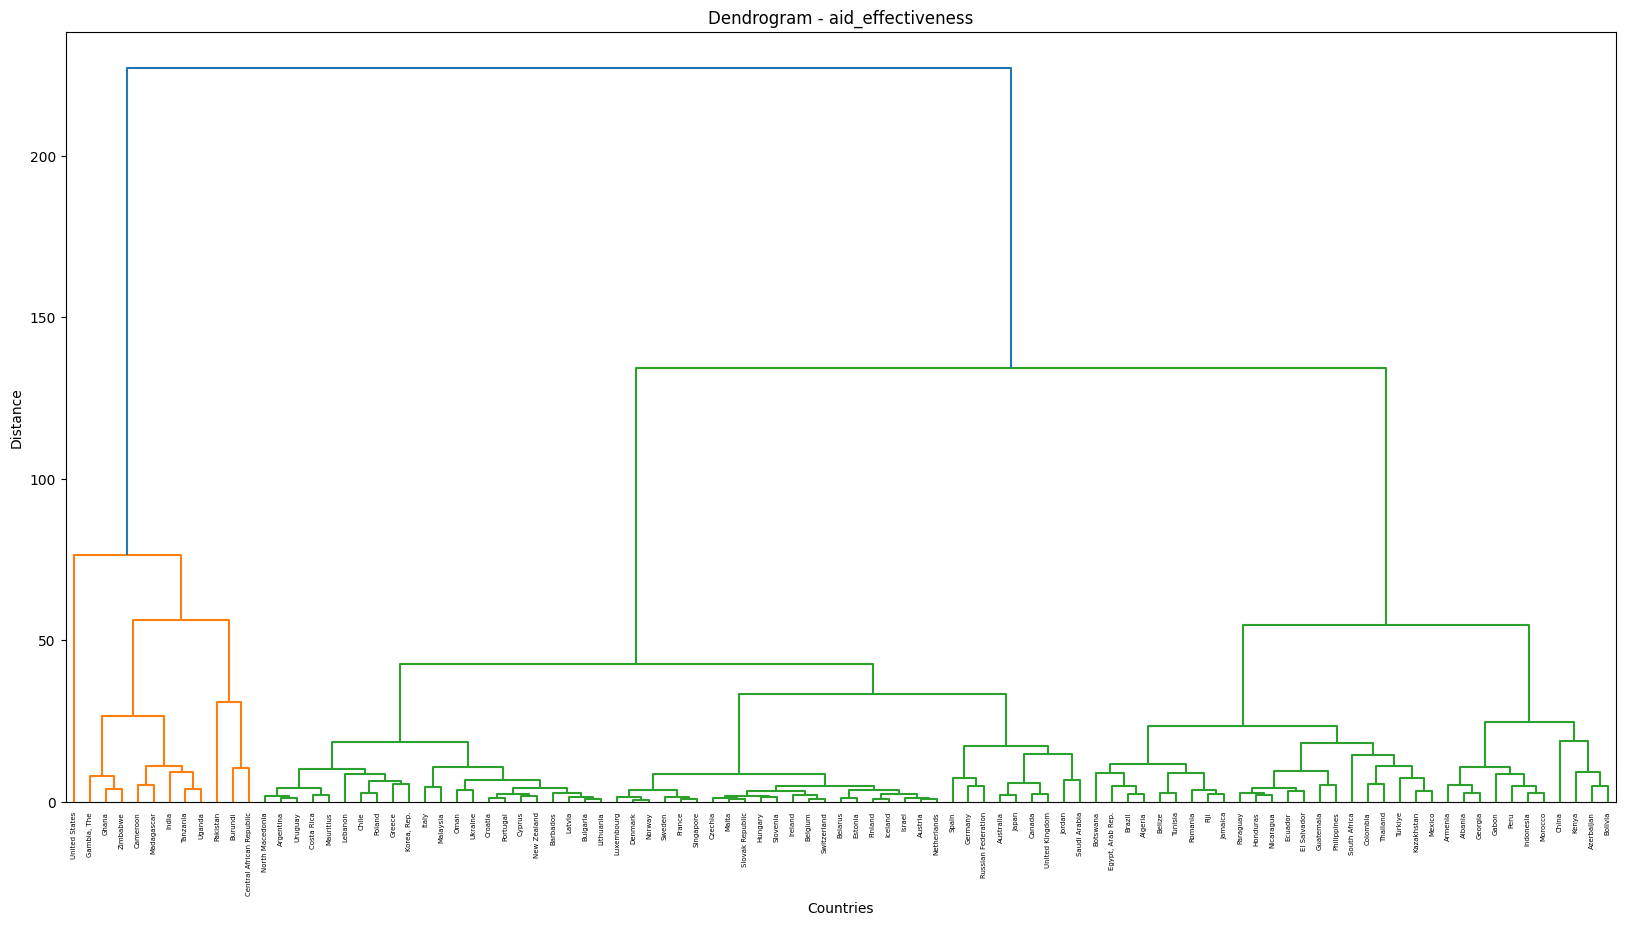

climate_change

Urban population (% of total population)
Population, total
Population growth (annual %)
Mortality rate, under-5 (per 1,000 live births)


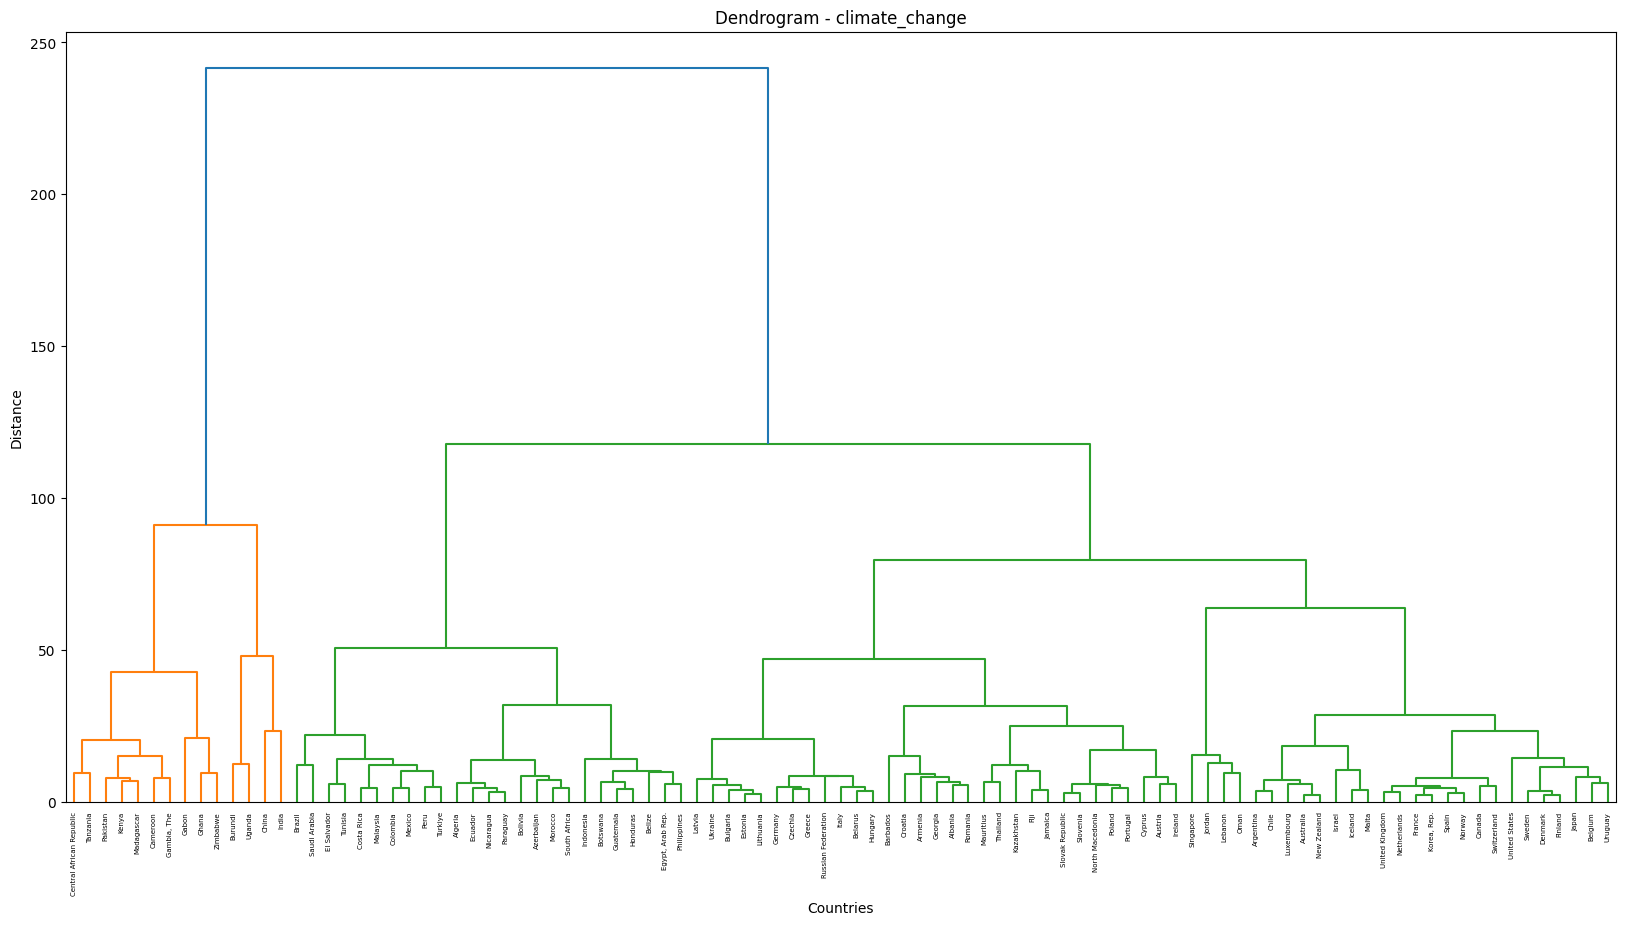

economy_growth

Price level ratio of PPP conversion factor (GDP) to market exchange rate
Gross domestic savings (% of GDP)
GDP per capita, PPP (constant 2017 international $)
GDP per capita growth (annual %)
GDP per capita (constant 2015 US$)
GDP, PPP (constant 2017 international $)
GDP growth (annual %)
GDP (constant 2015 US$)
GDP deflator (base year varies by country)
Inflation, GDP deflator (annual %)
Adjusted savings: energy depletion (current US$)
Adjusted savings: mineral depletion (current US$)
Adjusted savings: carbon dioxide damage (current US$)
Adjusted savings: education expenditure (% of GNI)
Medium and high-tech manufacturing value added (% manufacturing value added)
Gross capital formation (% of GDP)
Gross national expenditure (% of GDP)
Final consumption expenditure (% of GDP)
Households and NPISHs Final consumption expenditure (current US$)
General government final consumption expenditure (% of GDP)


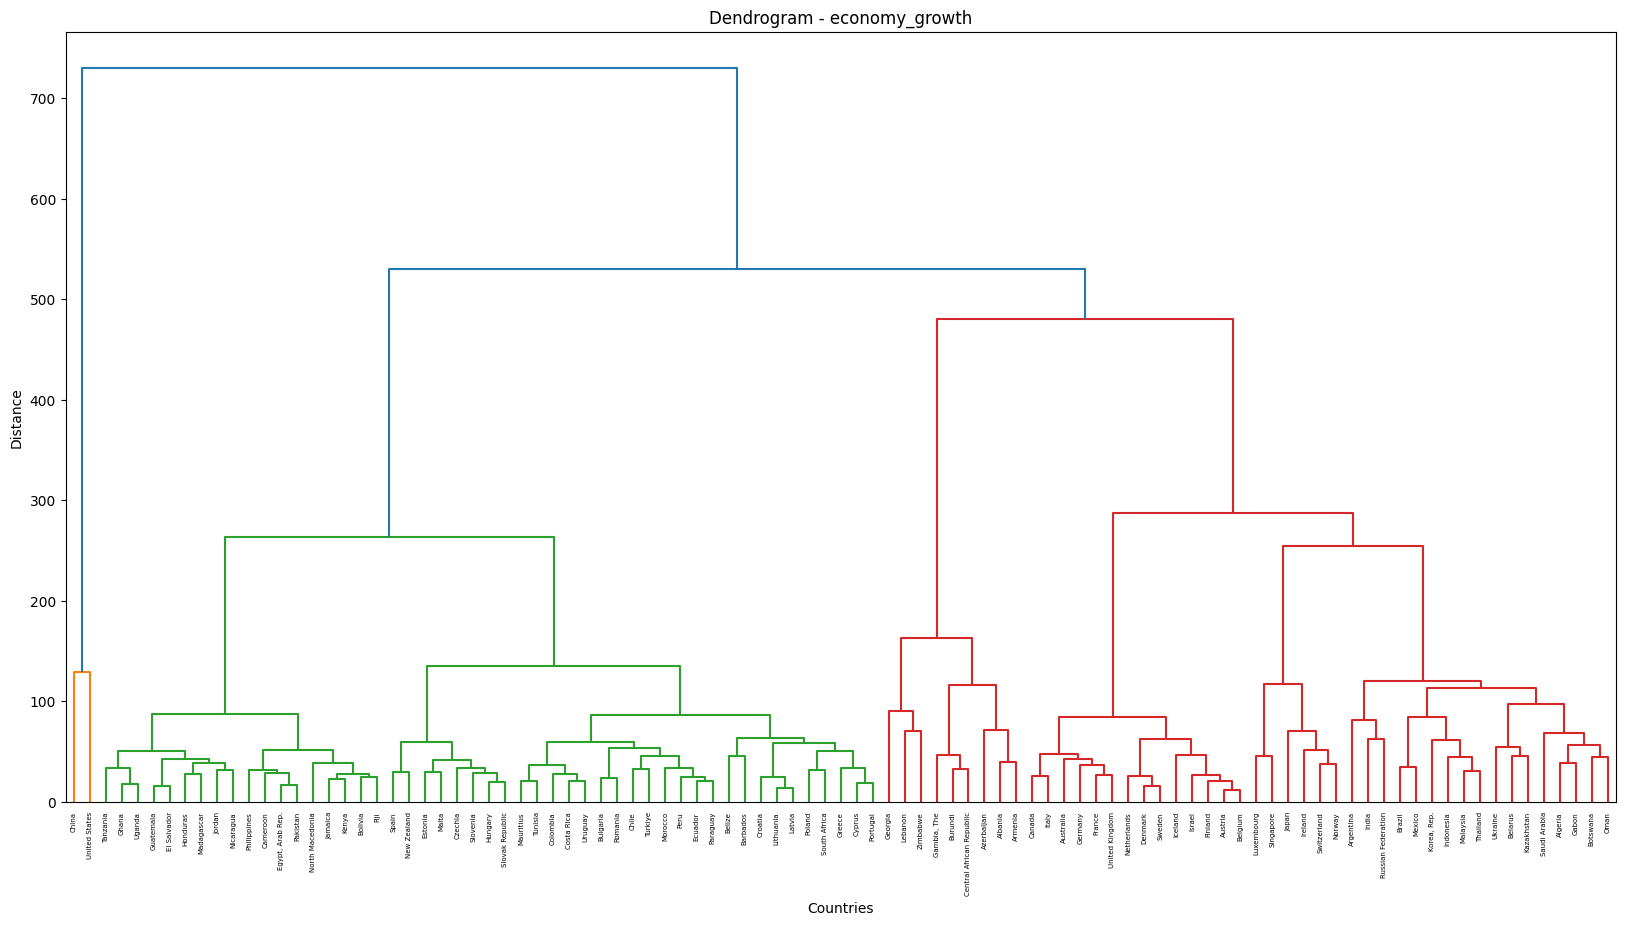

education

Population ages 15-64 (% of total population)
Population ages 0-14 (% of total population)
Unemployment, total (% of total labor force) (modeled ILO estimate)
Unemployment, male (% of male labor force) (modeled ILO estimate)
Unemployment, female (% of female labor force) (modeled ILO estimate)
Labor force, total
Labor force, female (% of total labor force)
Probability of dying among youth ages 20-24 years (per 1,000)
Probability of dying among adolescents ages 15-19 years (per 1,000)
Probability of dying among adolescents ages 10-14 years (per 1,000)
Probability of dying among children ages 5-9 years (per 1,000)
Number of deaths ages 20-24 years
Number of deaths ages 15-19 years
Number of deaths ages 10-14 years
Number of deaths ages 5-9 years
Secondary education, duration (years)
Lower secondary school starting age (years)
Primary education, duration (years)
Primary school starting age (years)


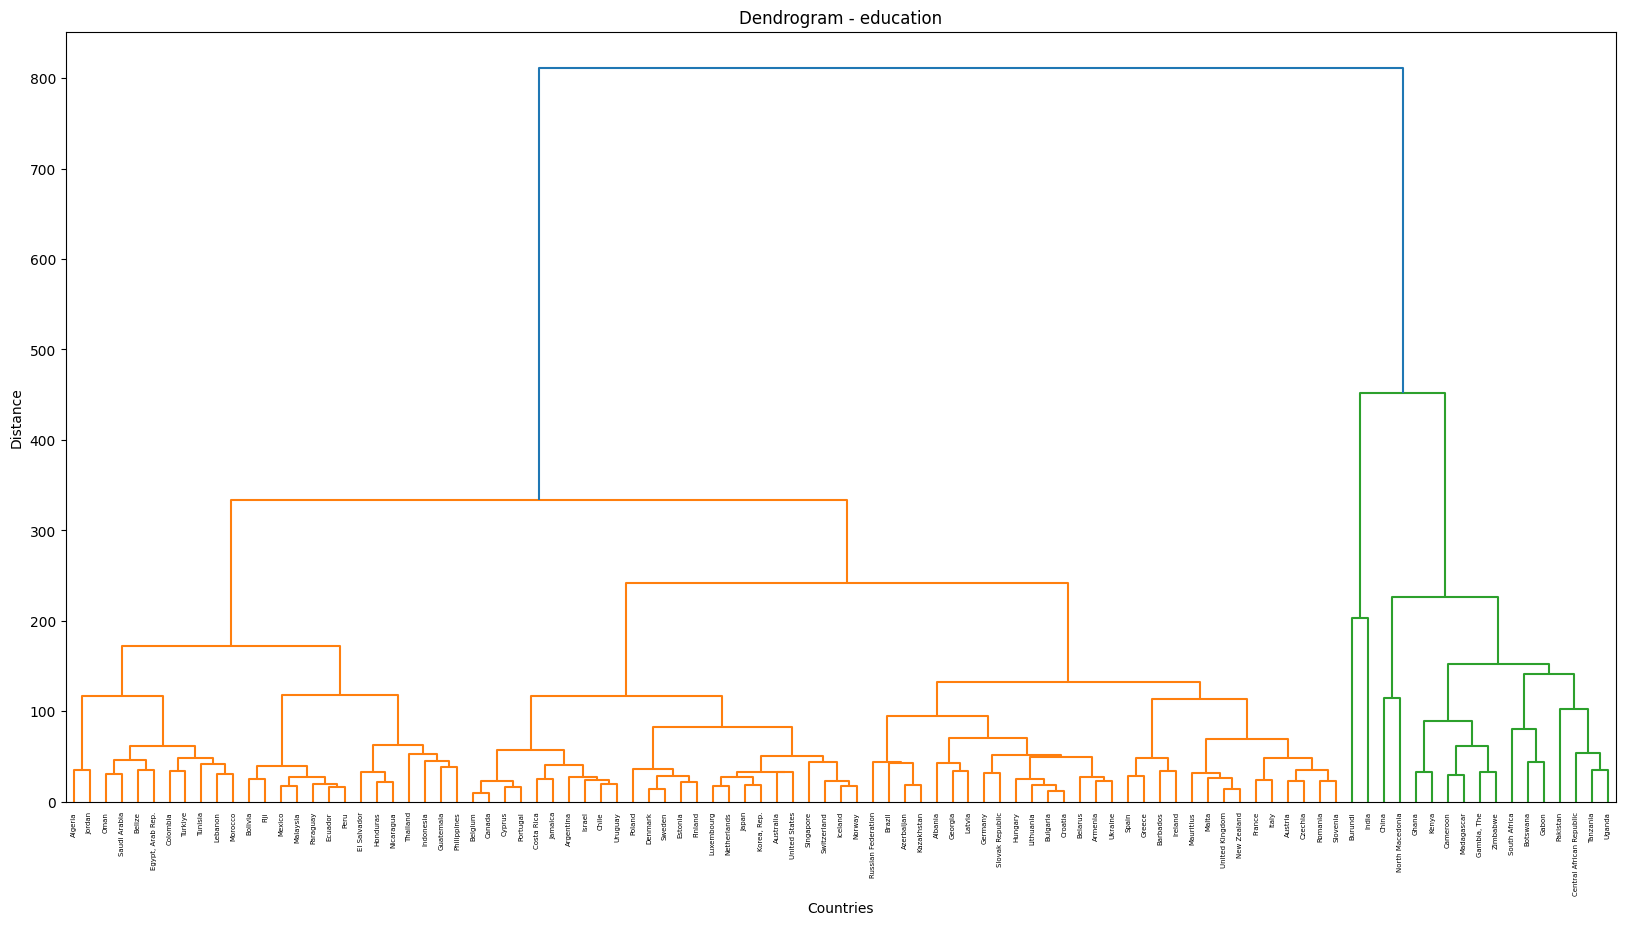

energy_mining

Adjusted savings: energy depletion (current US$)
Adjusted savings: mineral depletion (current US$)


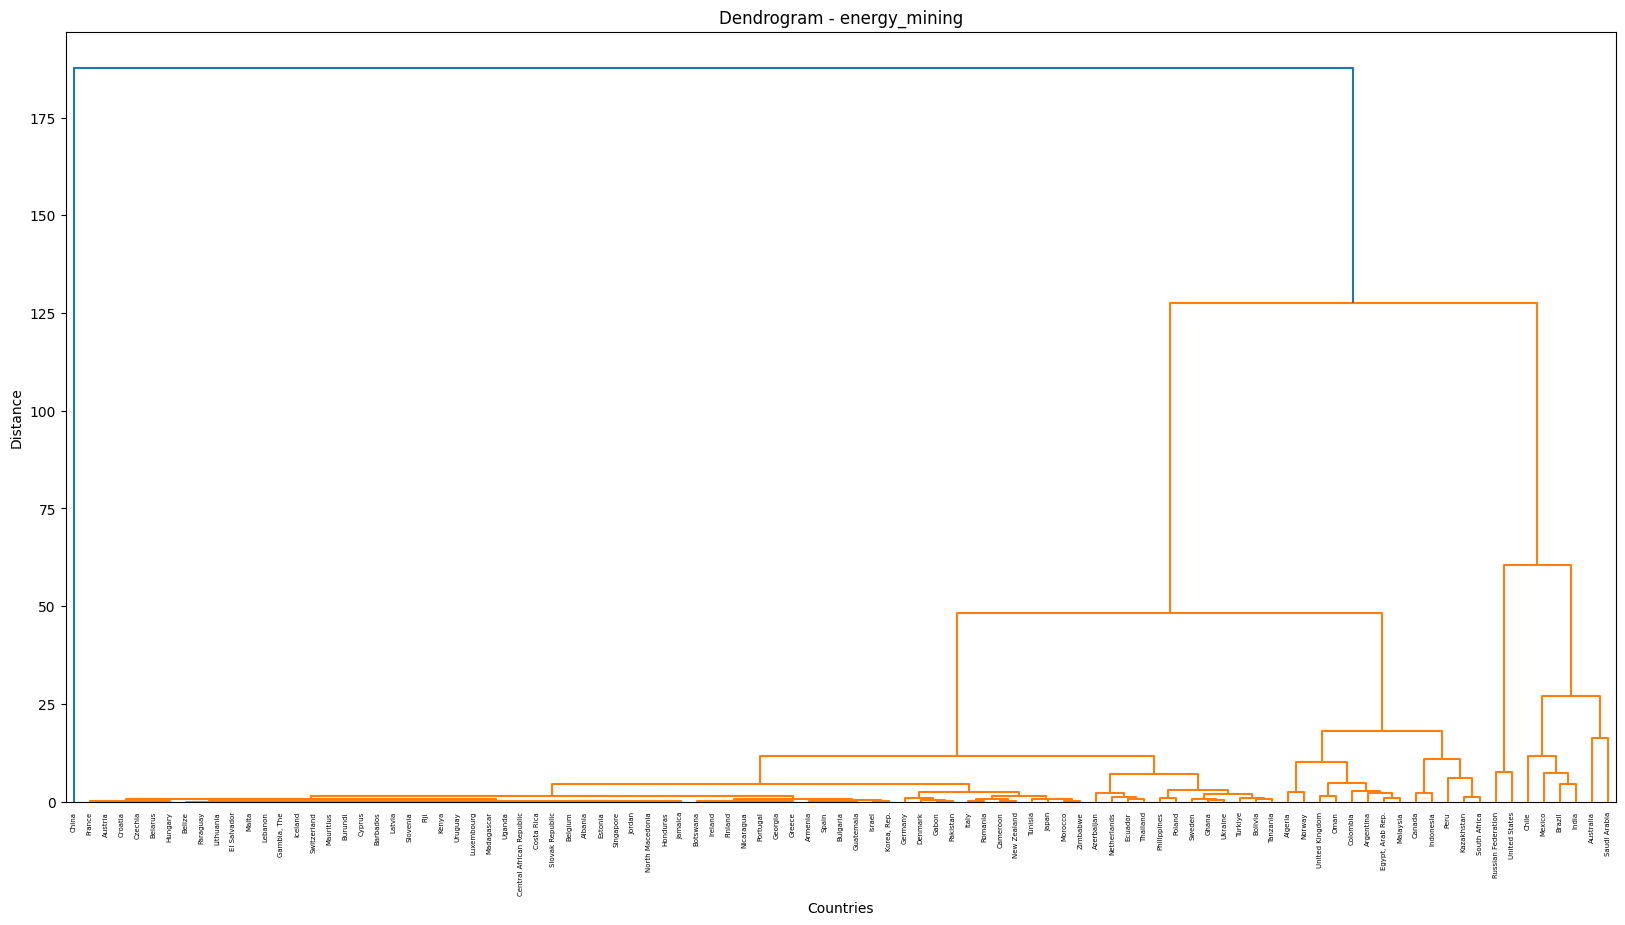

environment

Adjusted savings: energy depletion (current US$)
Adjusted savings: mineral depletion (current US$)
Adjusted savings: carbon dioxide damage (current US$)
Adjusted savings: education expenditure (% of GNI)
Capture fisheries production (metric tons)


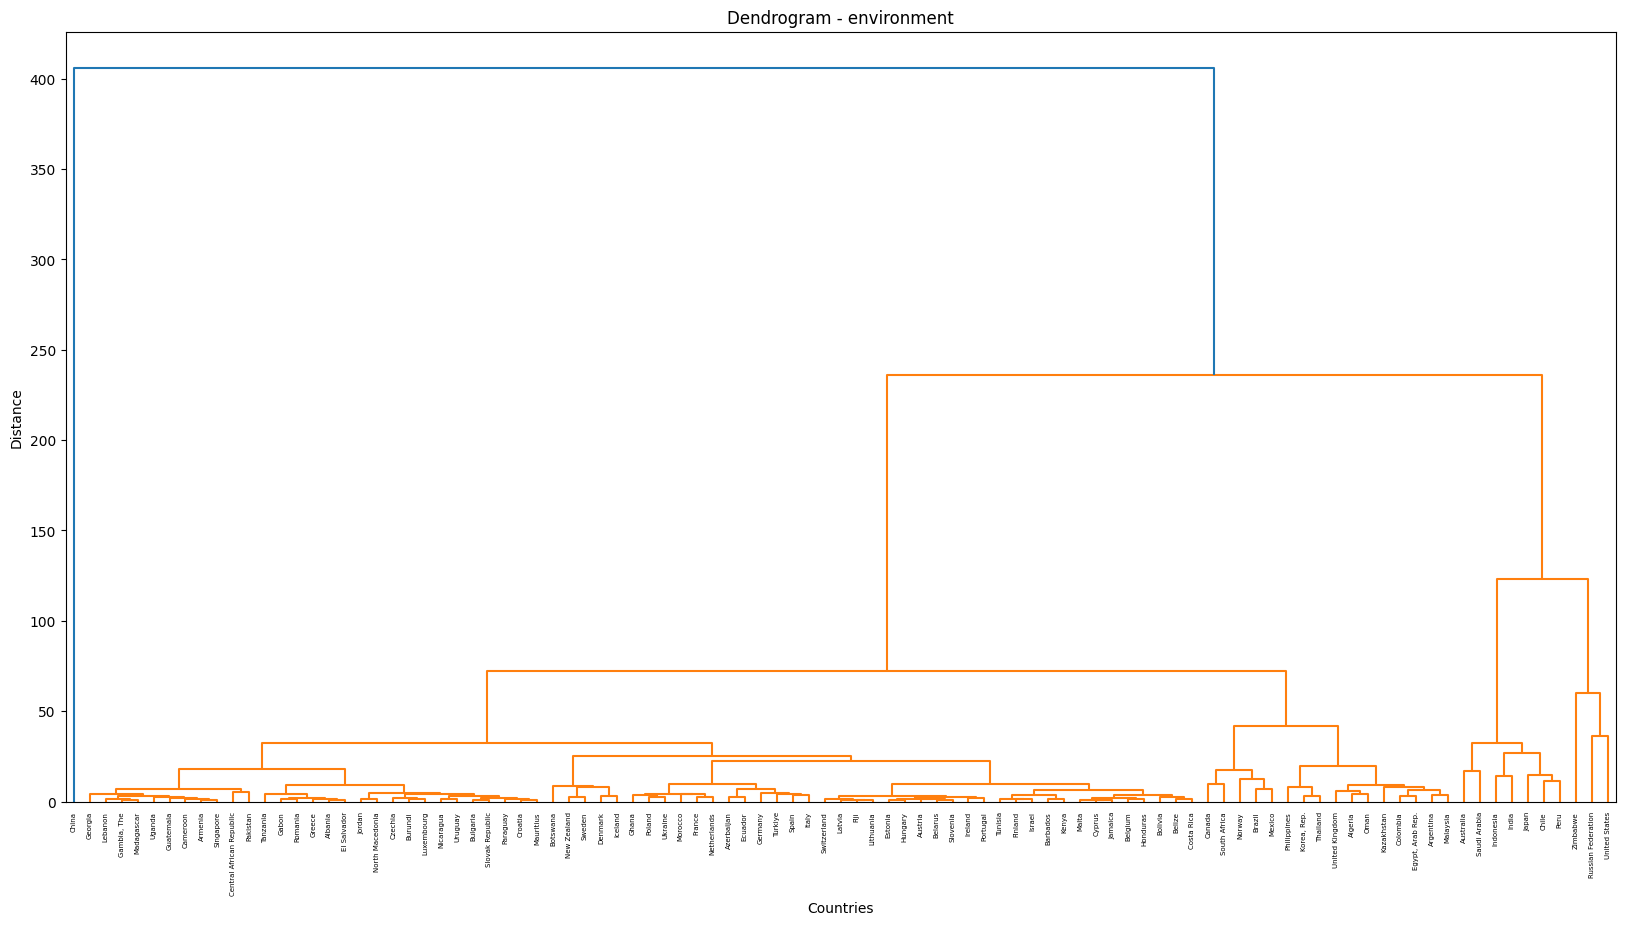

financial_sector

Net migration
GDP deflator: linked series (base year varies by country)
Inflation, GDP deflator: linked series (annual %)


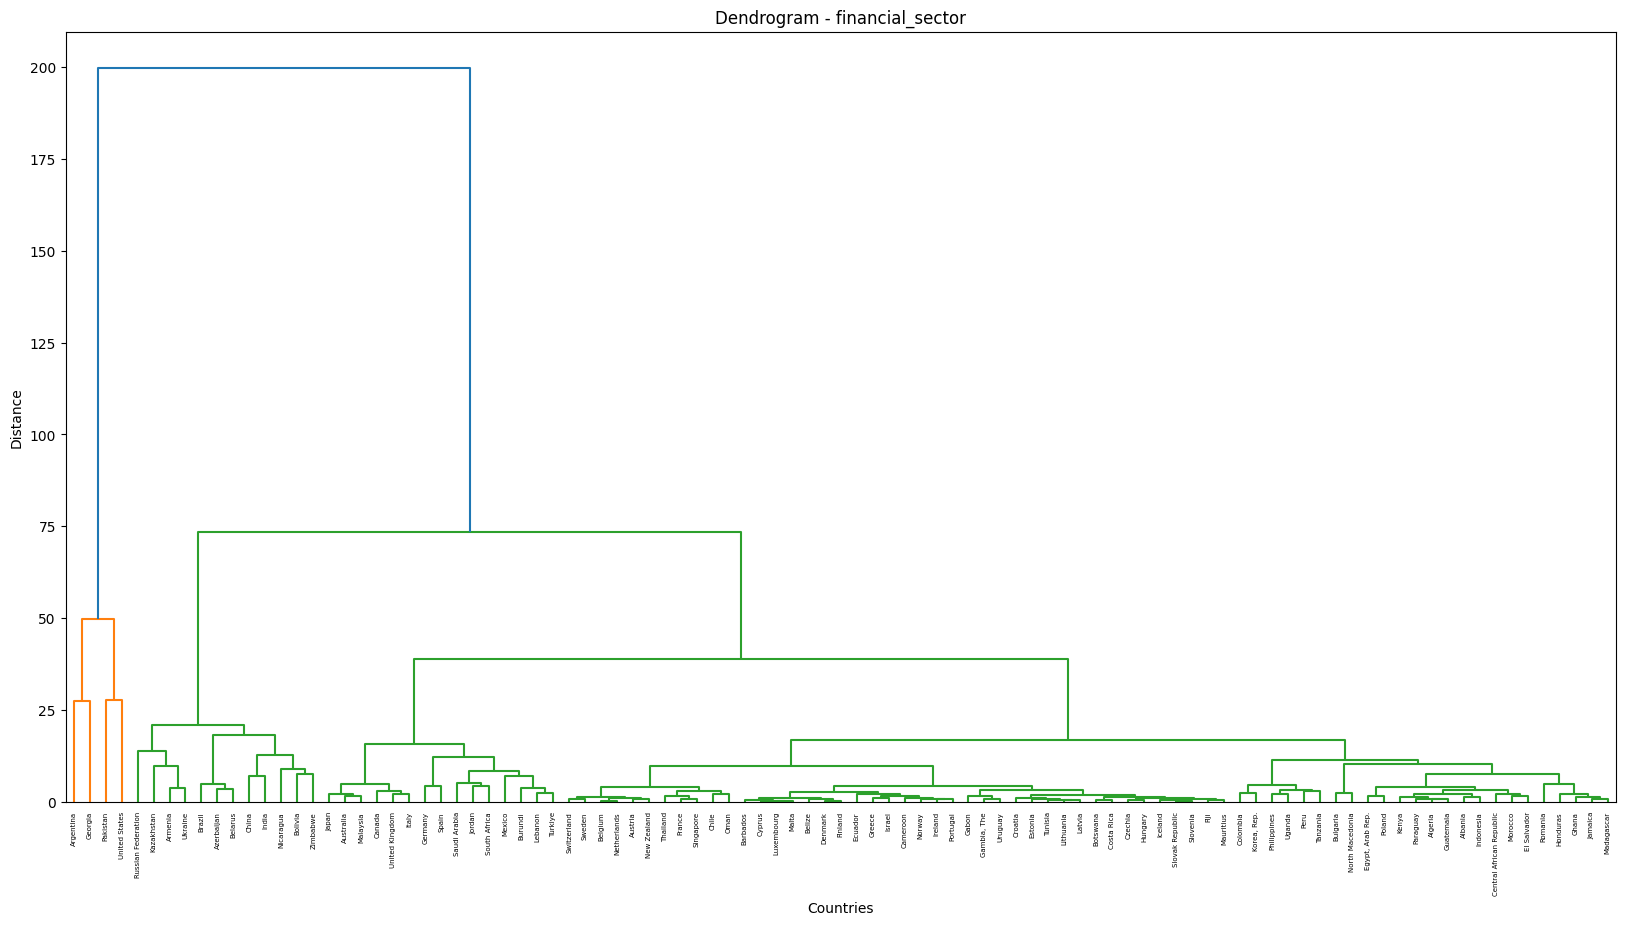

gender

Fertility rate, total (births per woman)
Adolescent fertility rate (births per 1,000 women ages 15-19)
Unemployment, male (% of male labor force) (modeled ILO estimate)
Unemployment, female (% of female labor force) (modeled ILO estimate)
Labor force, female (% of total labor force)
Employers, male (% of male employment) (modeled ILO estimate)
Employers, female (% of female employment) (modeled ILO estimate)
Women Business and the Law Index Score (scale 1-100)


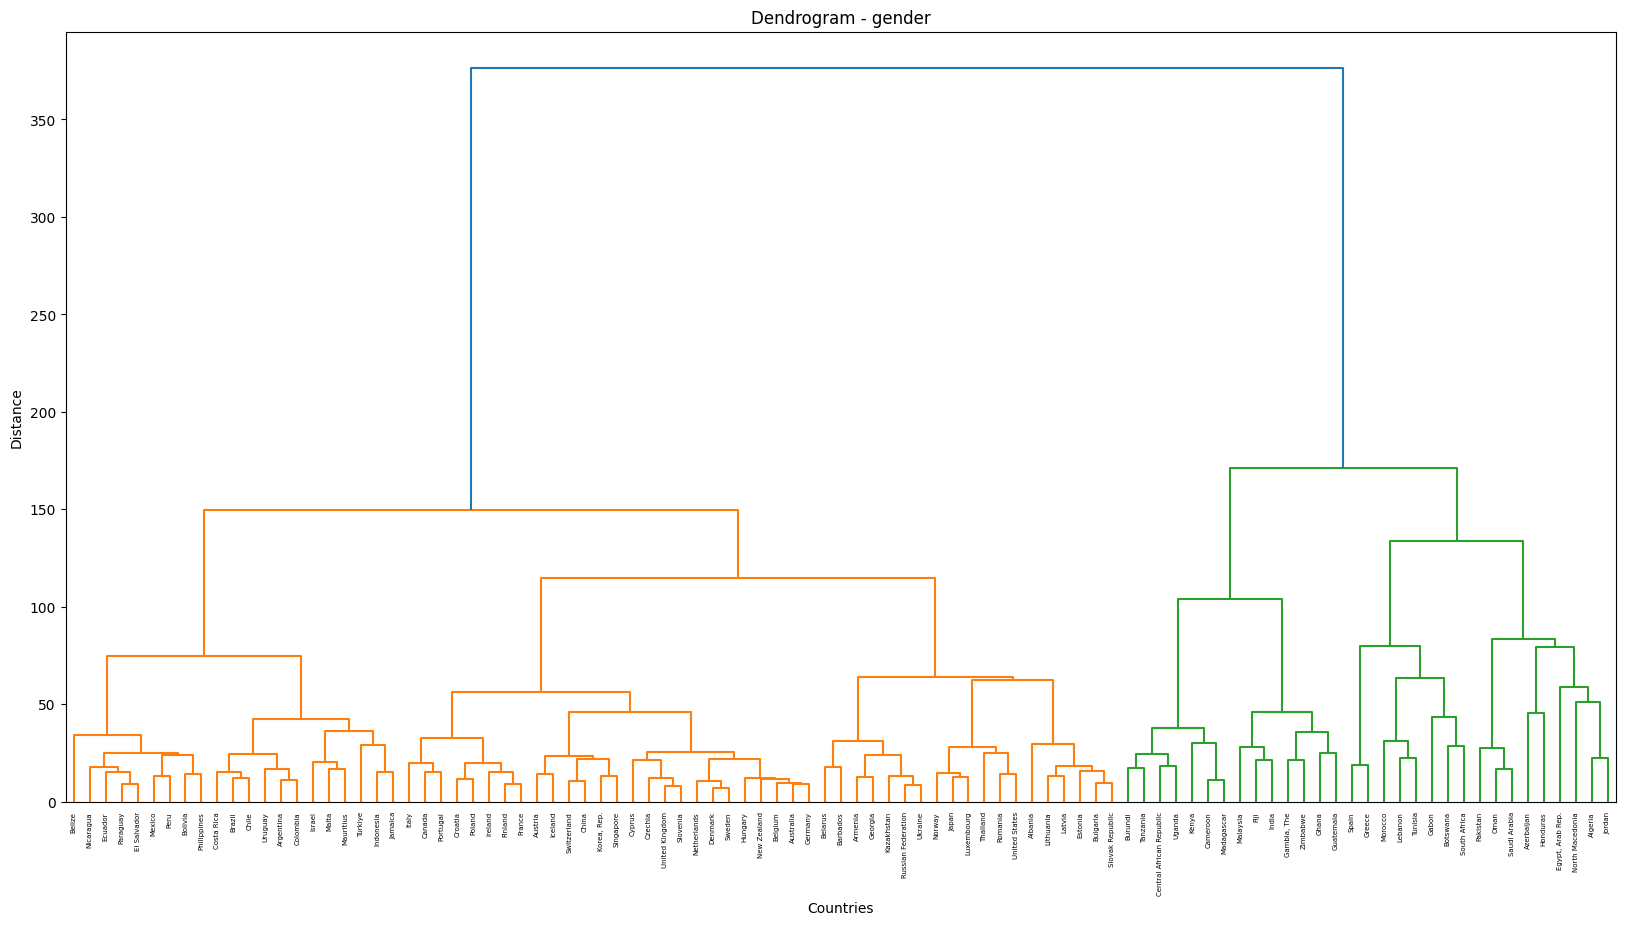

health

Population, male (% of total population)
Population, female (% of total population)
Population, total
Population growth (annual %)
Age dependency ratio, young (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio (% of working-age population)
Sex ratio at birth (male births per female births)
Population ages 65 and above (% of total population)
Population ages 65 and above, total
Population ages 15-64 (% of total population)
Population ages 15-64, total
Population ages 0-14 (% of total population)
Population ages 0-14, total
Fertility rate, total (births per woman)
Life expectancy at birth, total (years)
Mortality rate, infant (per 1,000 live births)
Death rate, crude (per 1,000 people)
Birth rate, crude (per 1,000 people)
Adolescent fertility rate (births per 1,000 women ages 15-19)
Net migration
Immunization, measles (% of children ages 12-23 months)
Immunization, DPT (% of children ages 12-23 months)
Mortality rate, neonat

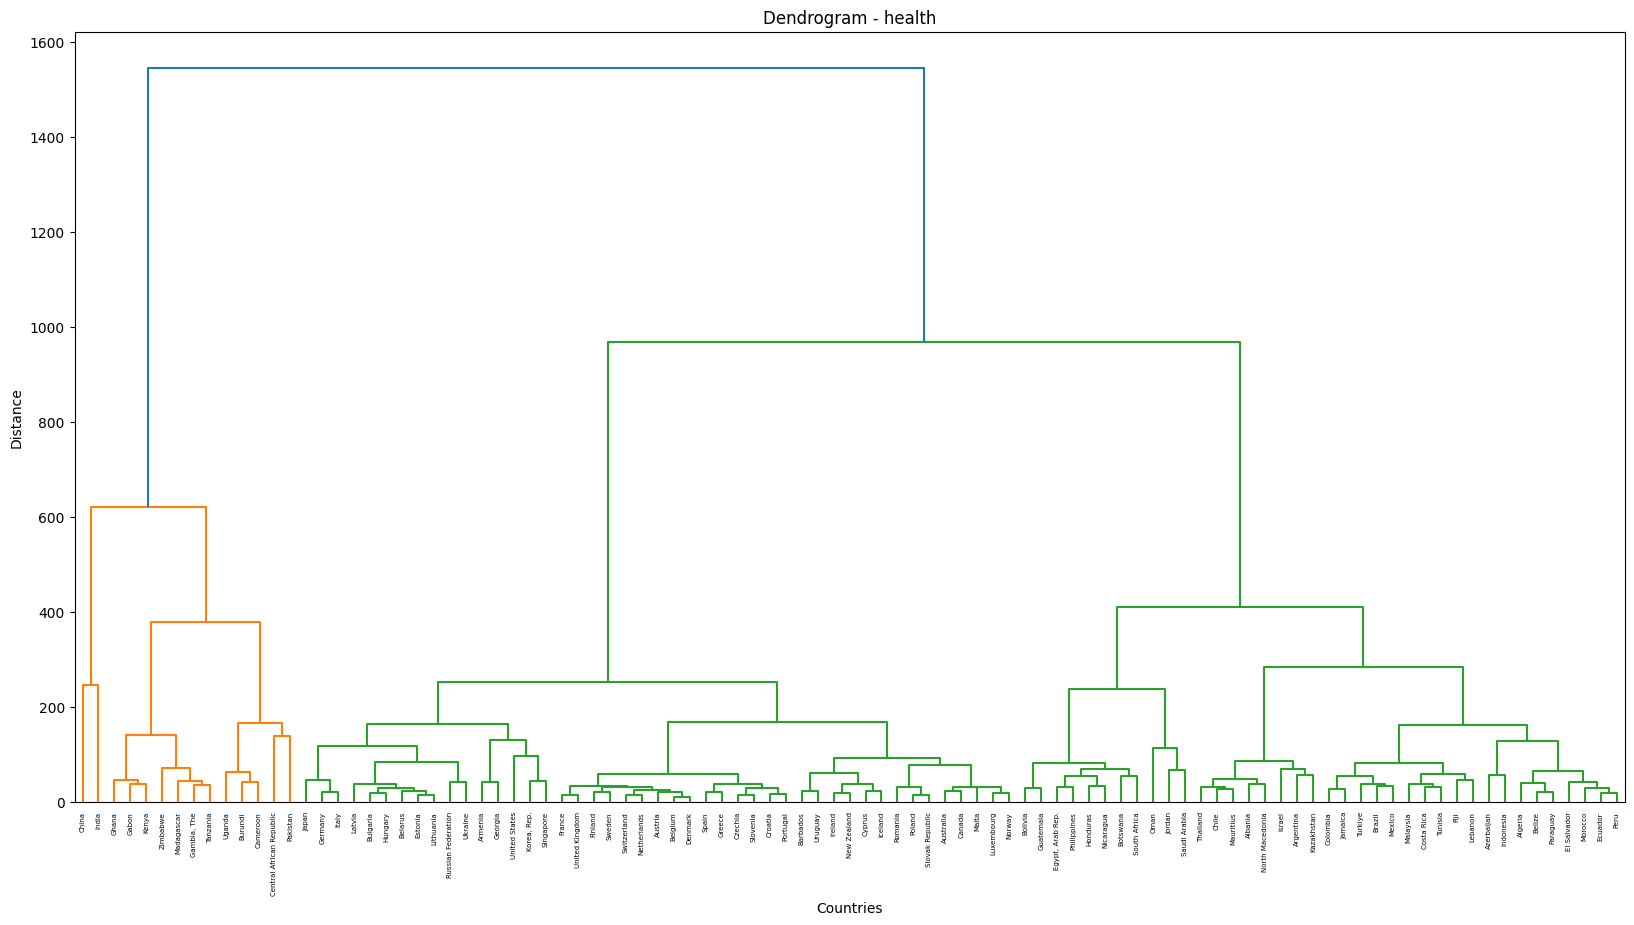

infrastructure

Individuals using the Internet (% of population)
Fixed telephone subscriptions (per 100 people)
Mobile cellular subscriptions (per 100 people)


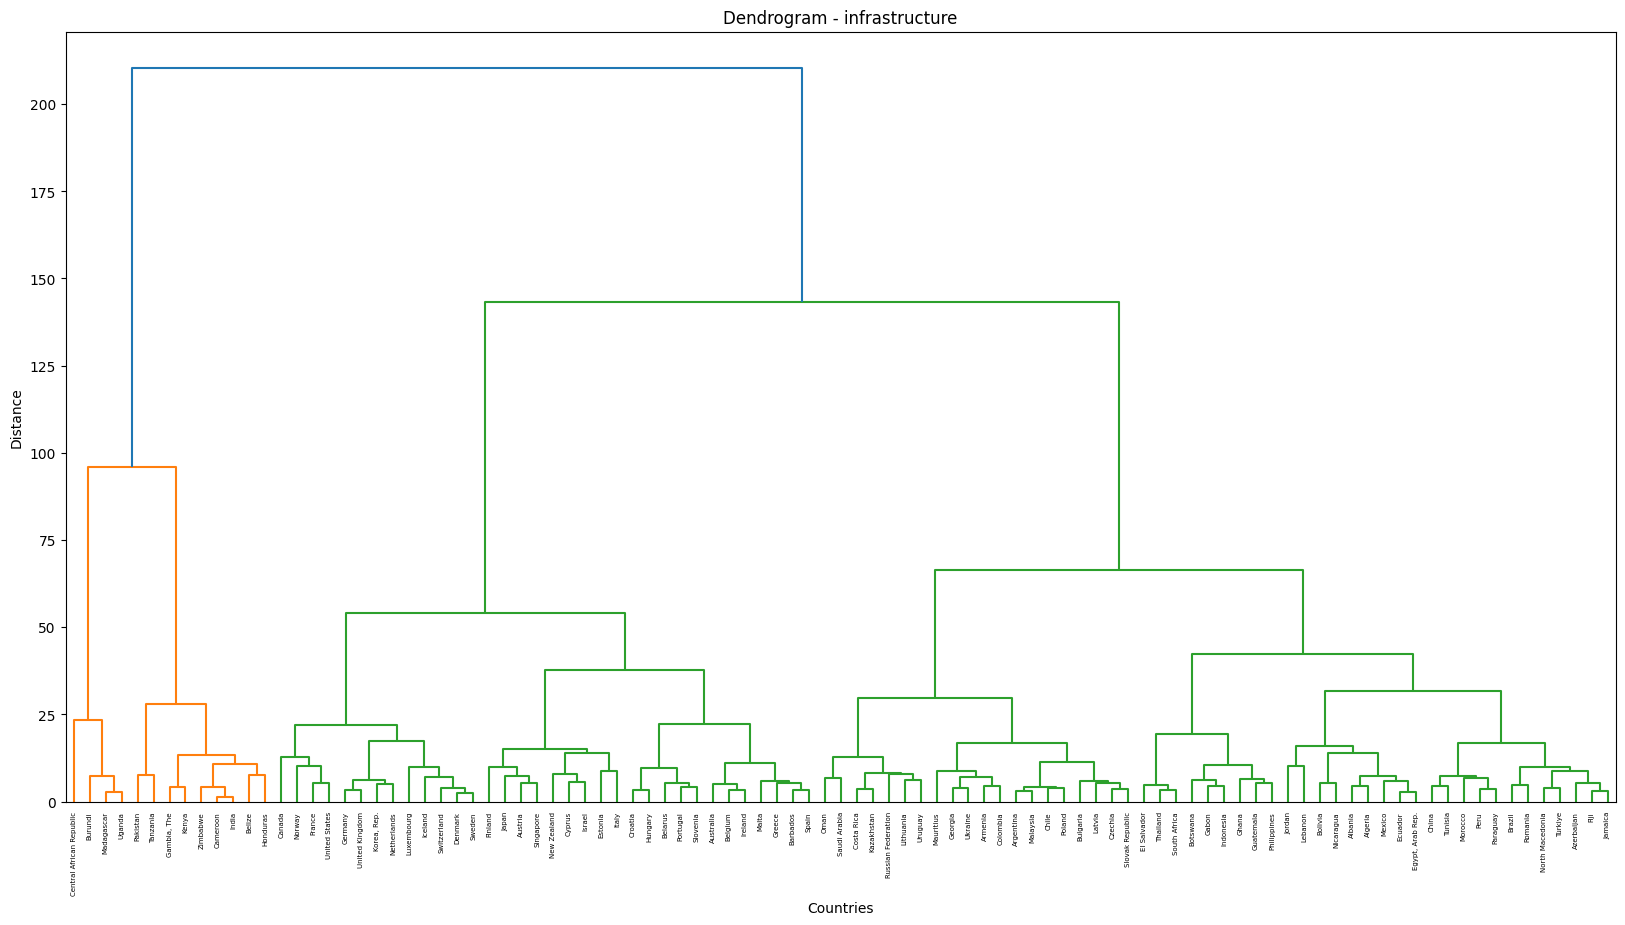

private_sector

Medium and high-tech exports (% manufactured exports)


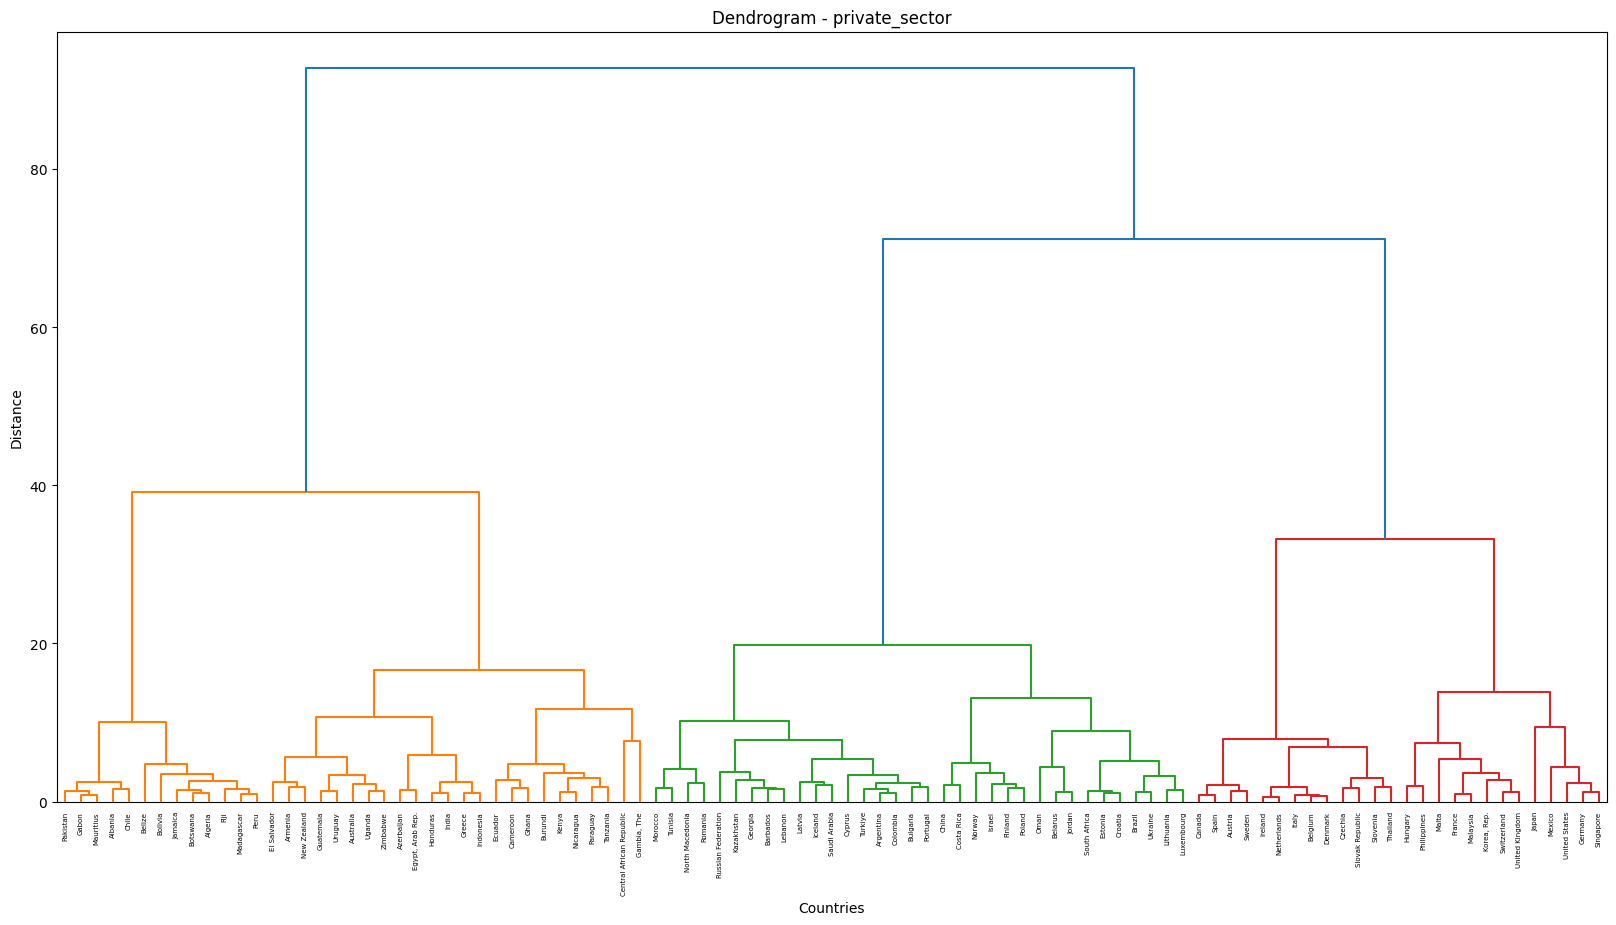

social_development

Adolescent fertility rate (births per 1,000 women ages 15-19)
Unemployment, male (% of male labor force) (modeled ILO estimate)
Unemployment, female (% of female labor force) (modeled ILO estimate)
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)
Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)


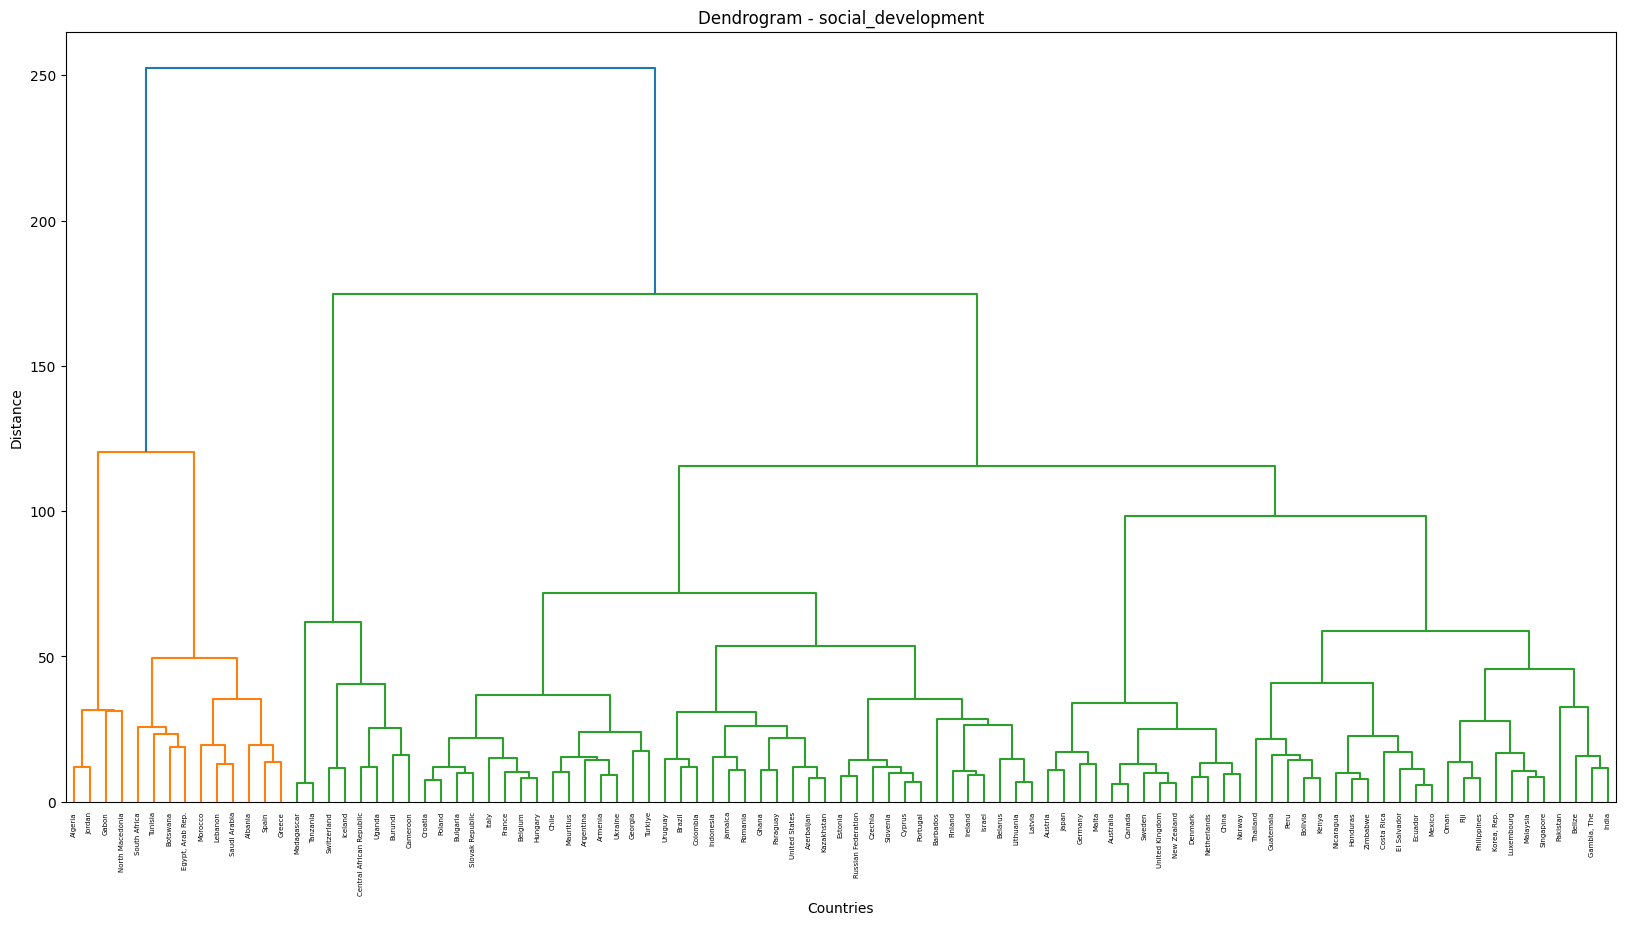

social_protection_labor

Unemployment, total (% of total labor force) (modeled ILO estimate)
Unemployment, male (% of male labor force) (modeled ILO estimate)
Unemployment, female (% of female labor force) (modeled ILO estimate)
Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)
Labor force, total
Labor force, female (% of total labor force)
Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)
Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)
Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)
Employment in services (% of total employment) (modeled ILO estimate)
Employment in industry (% of total employment) (modeled ILO estimate)
Contributing family workers, total (% of total employment) (modeled ILO estimate)
Wage and salaried workers, total (% of total emp

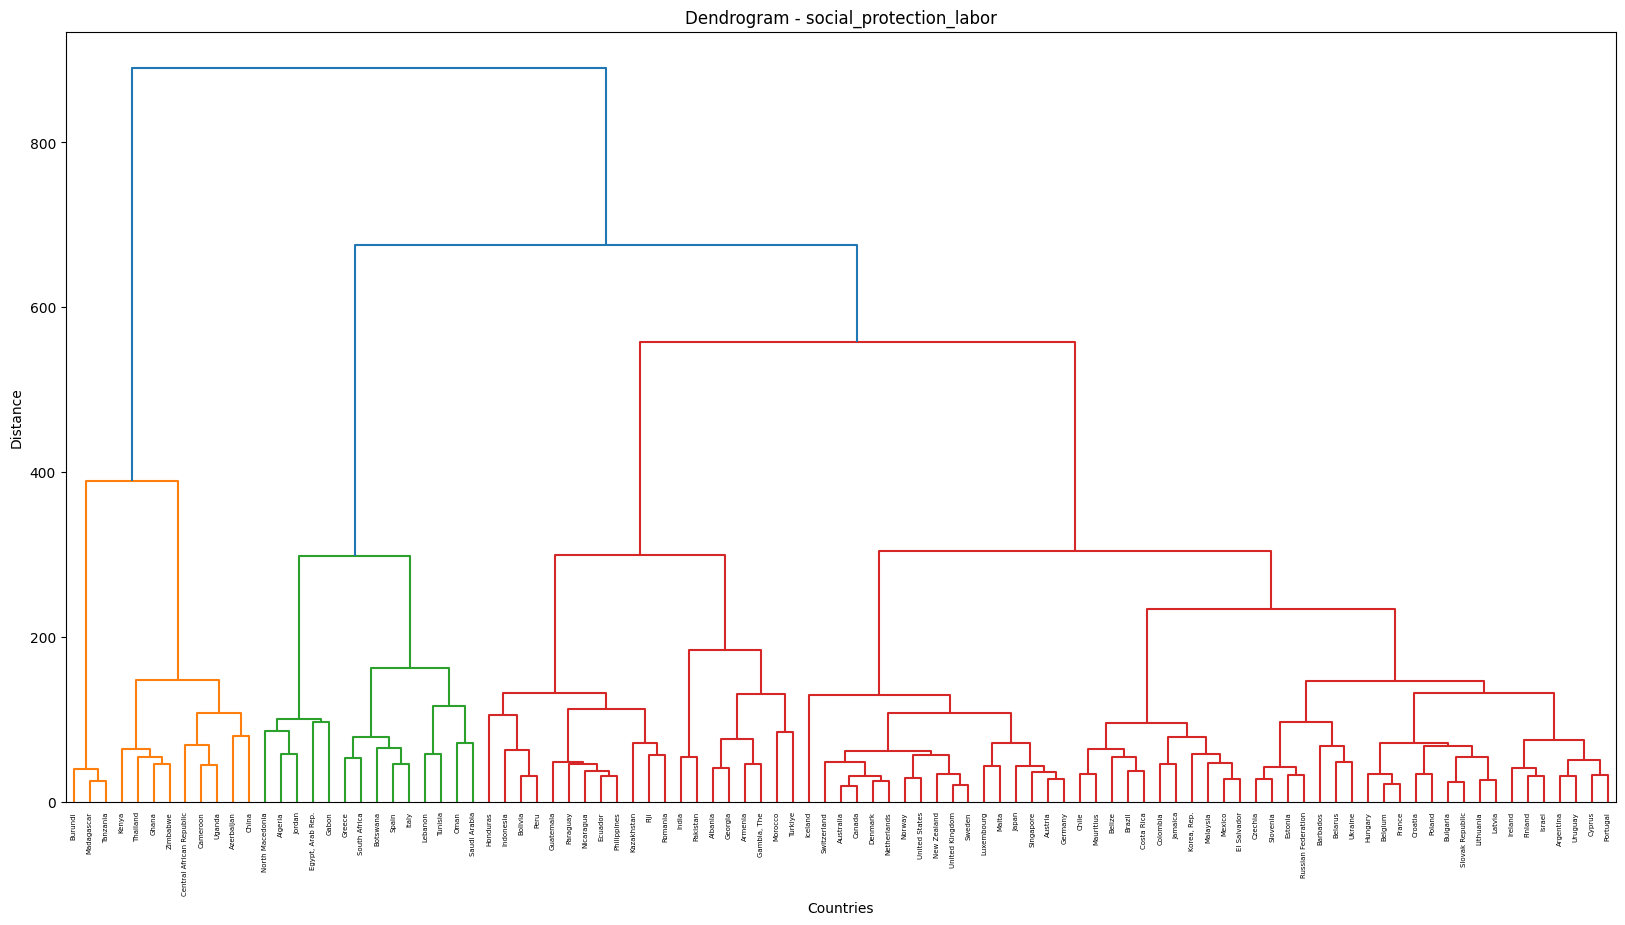

trade

Medium and high-tech exports (% manufactured exports)


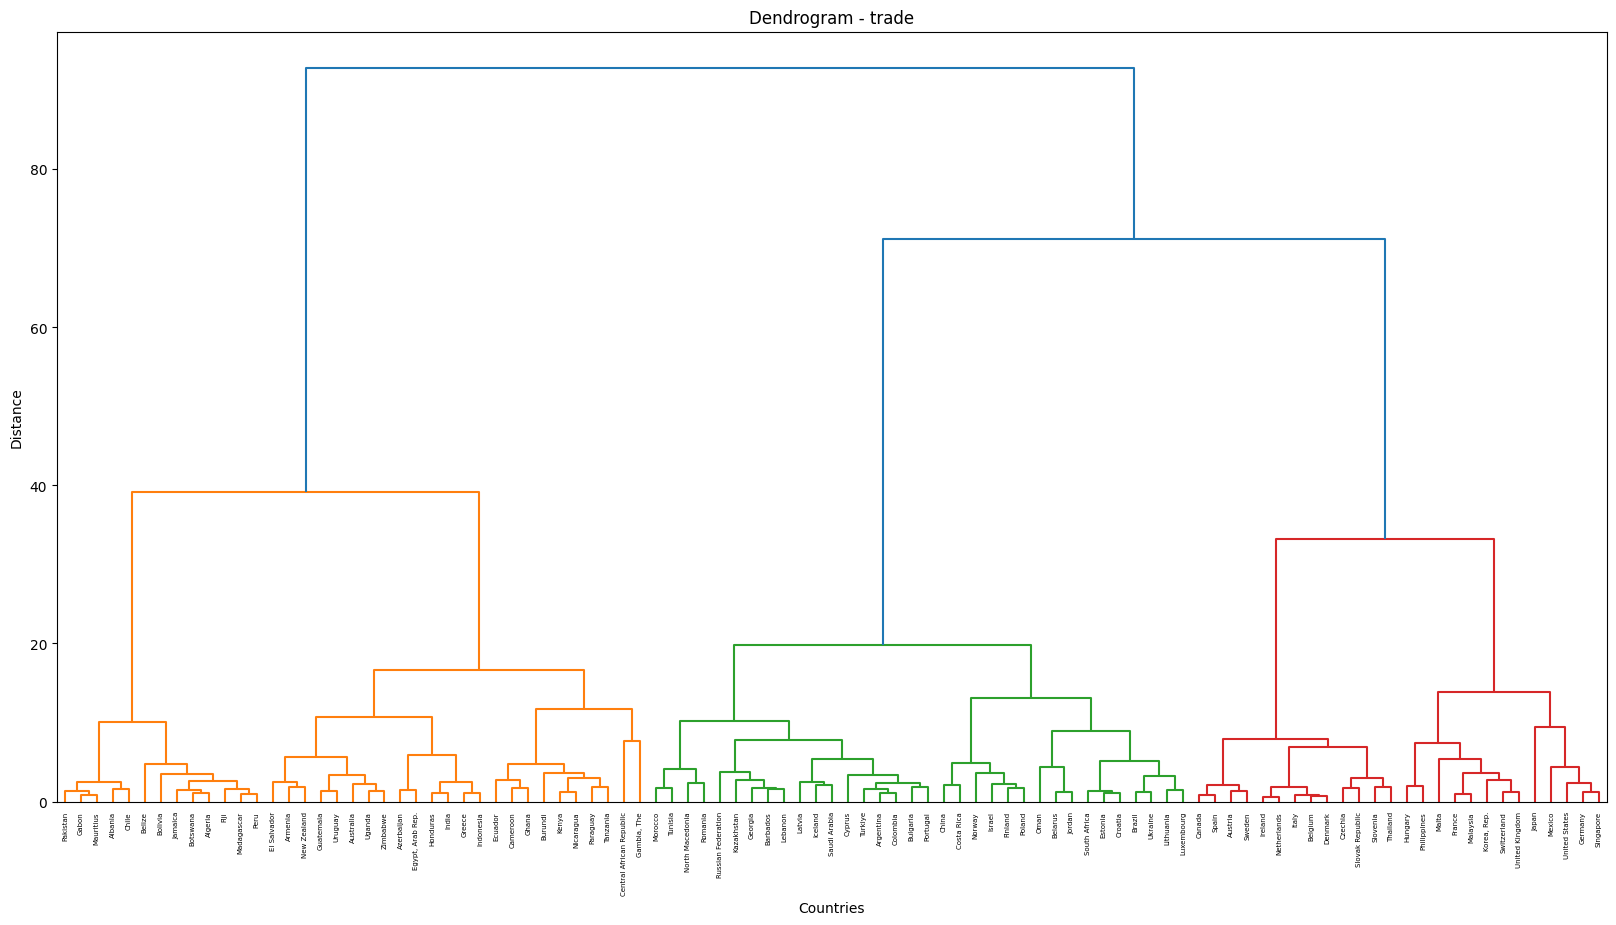

urban_developmen

Urban population (% of total population)
Population density (people per sq. km of land area)


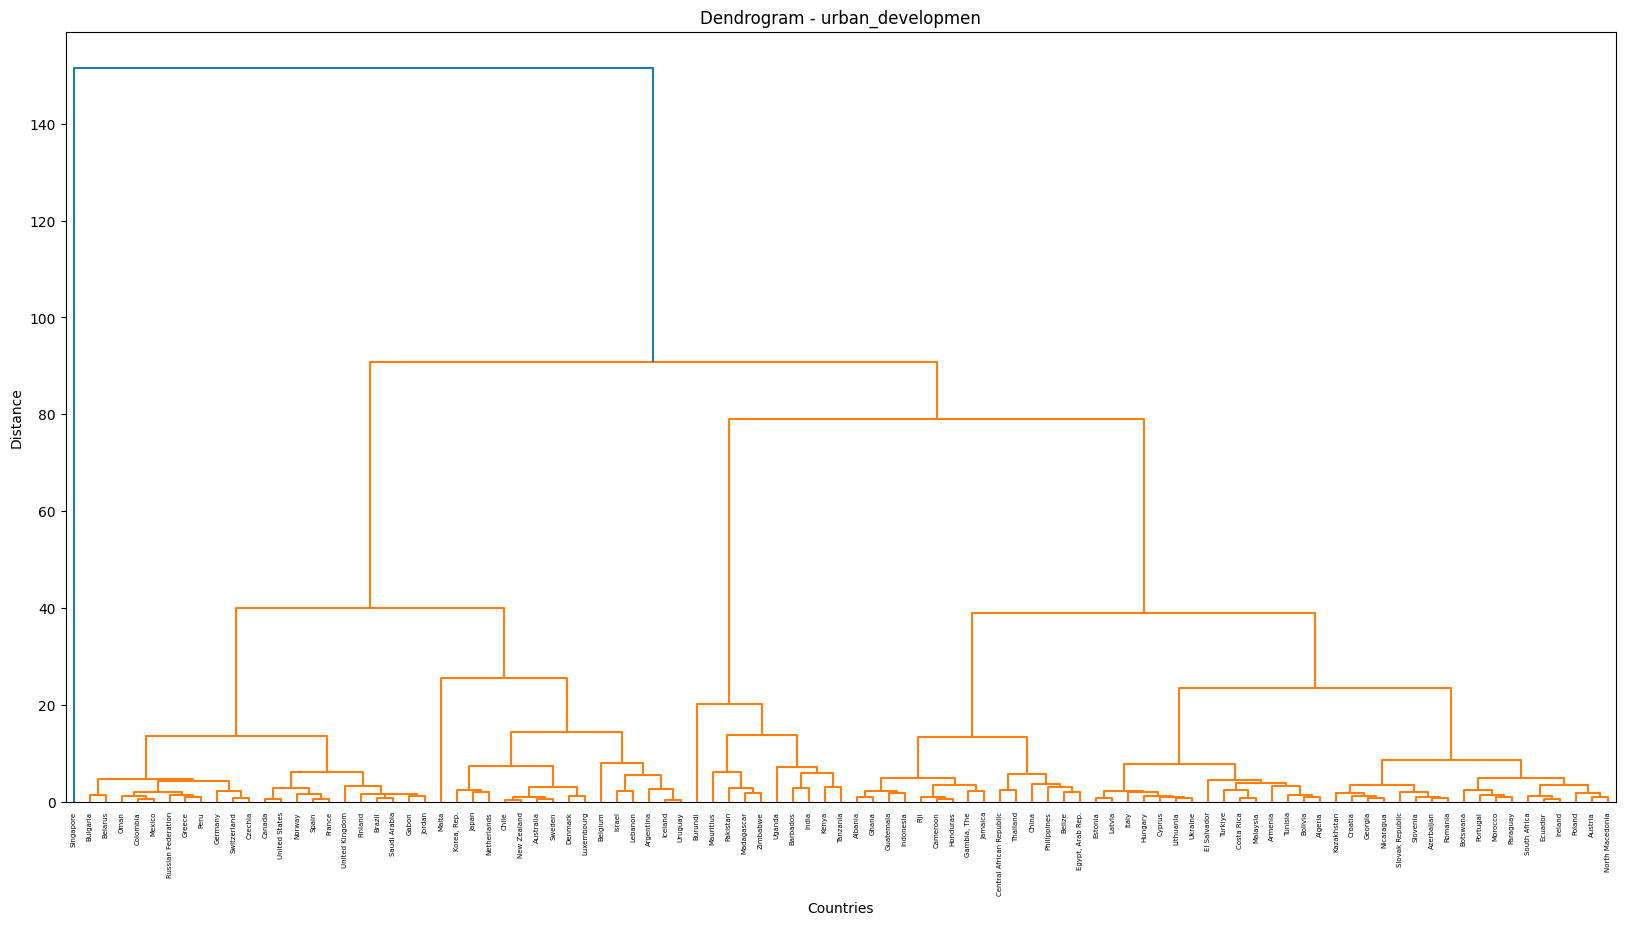

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def hierarchical_clustering(df, category_name):
    dtw_matrix = get_sum_of_dtw_matrix(df, category_name)
    
    # Obliczanie macierzy połączeń
    Z = linkage(dtw_matrix, 'ward')
    
    # Rysowanie dendrogramu
    plt.figure(figsize=(20, 10))
    plt.title(f'Dendrogram - {category_name}')
    dendrogram(Z, labels=dtw_matrix.index, leaf_rotation=90)
    plt.xlabel('Countries')
    plt.ylabel('Distance')
    plt.show()

# Wywołanie funkcji dla każdej kategorii
for category_name in df['Category Name'].unique():
    hierarchical_clustering(df, category_name)


